In [18]:
%load_ext autoreload
%autoreload 2

import json
import operator
import os
from pathlib import Path
import re

import numpy as np
from matplotlib import pyplot as plt, rc
plt.rcParams['figure.figsize'] = [14, 8]
rc('font', **{'family': 'Open Sans', 'size': 18})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
directory = os.path.join(Path().resolve().parent, "decode/experiment-1")
metrics = {}
for root, dirs, files in os.walk(directory):
    for file in files:
        if file == "metrics.json":
            step = int(root.split(".")[-1])
            with open(os.path.join(root, file), "r") as f:
                metrics[step] = json.load(f)
steps = sorted(metrics.keys())
metrics = [value for key, value in sorted(metrics.items(), key=operator.itemgetter(0))]

In [3]:
jga_all = [metric["#ALL_SERVICES"]["joint_goal_accuracy"] for metric in metrics]
jga_seen = [metric["#SEEN_SERVICES"]["joint_goal_accuracy"] for metric in metrics]
jga_unseen = [metric["#UNSEEN_SERVICES"]["joint_goal_accuracy"] for metric in metrics]
jca_all = [metric["#ALL_SERVICES"]["joint_cat_accuracy"] for metric in metrics]
jca_seen = [metric["#SEEN_SERVICES"]["joint_cat_accuracy"] for metric in metrics]
jca_unseen = [metric["#UNSEEN_SERVICES"]["joint_cat_accuracy"] for metric in metrics]
jnca_all = [metric["#ALL_SERVICES"]["joint_noncat_accuracy"] for metric in metrics]
jnca_seen = [metric["#SEEN_SERVICES"]["joint_noncat_accuracy"] for metric in metrics]
jnca_unseen = [metric["#UNSEEN_SERVICES"]["joint_noncat_accuracy"] for metric in metrics]

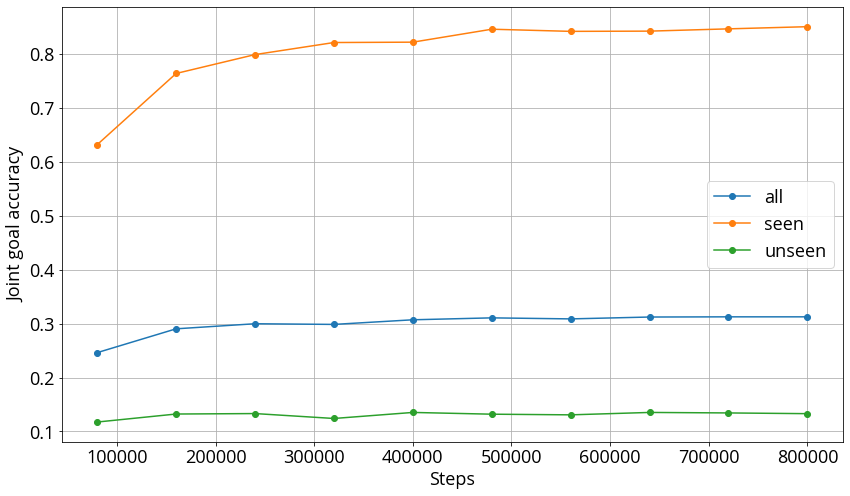

In [11]:
plt.plot(steps, jga_all, marker="o", label="all")
plt.plot(steps, jga_seen, marker="o", label="seen")
plt.plot(steps, jga_unseen, marker="o", label="unseen")
plt.xlabel("Steps")
plt.ylabel("Joint goal accuracy")
plt.grid()
plt.legend()
plt.show()

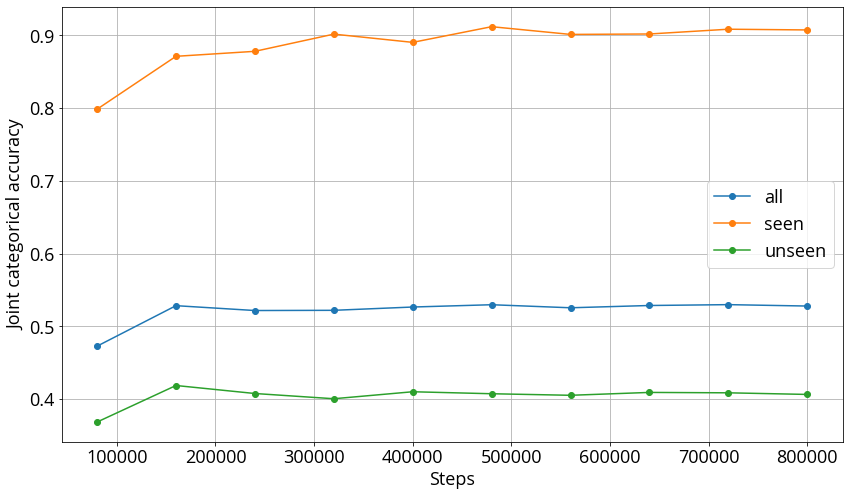

In [12]:
plt.plot(steps, jca_all, marker="o", label="all")
plt.plot(steps, jca_seen, marker="o", label="seen")
plt.plot(steps, jca_unseen, marker="o", label="unseen")
plt.xlabel("Steps")
plt.ylabel("Joint categorical accuracy")
plt.grid()
plt.legend()
plt.show()

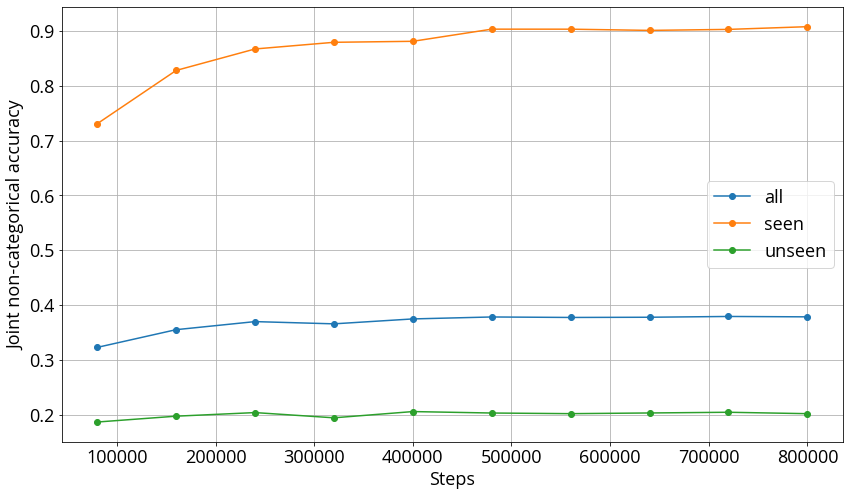

In [13]:
plt.plot(steps, jnca_all, marker="o", label="all")
plt.plot(steps, jnca_seen, marker="o", label="seen")
plt.plot(steps, jnca_unseen, marker="o", label="unseen")
plt.xlabel("Steps")
plt.ylabel("Joint non-categorical accuracy")
plt.grid()
plt.legend()
plt.show()

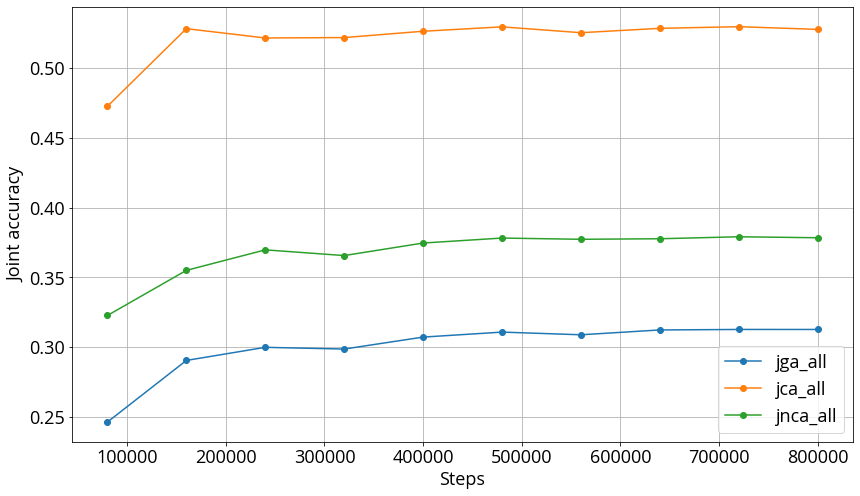

In [15]:
plt.plot(steps, jga_all, marker="o", label="jga_all")
# plt.plot(steps, jga_seen, marker="o", label="jga_seen")
# plt.plot(steps, jga_unseen, marker="o", label="jga_unseen")
plt.plot(steps, jca_all, marker="o", label="jca_all")
# plt.plot(steps, jca_seen, marker="o", label="jca_seen")
# plt.plot(steps, jca_unseen, marker="o", label="jca_unseen")
plt.plot(steps, jnca_all, marker="o", label="jnca_all")
# plt.plot(steps, jnca_seen, marker="o", label="jnca_seen")
# plt.plot(steps, jnca_unseen, marker="o", label="jnca_unseen")
plt.xlabel("Steps")
plt.ylabel("Joint accuracy")
plt.grid()
plt.legend()
plt.show()

In [30]:
directory = os.path.join(Path().resolve().parent, "models/experiment-1")
log = os.path.join(directory, "logs/train.log")
batch_size = None
train_steps, dev_steps = [], []
train_loss, dev_loss = [], []
with open(log, "r") as f:
    for line in f:
        if batch_size is None and "batch_size" in line:
            batch_size = int(line.split()[-1])
            continue
        result = re.search(r"Batch: ([0-9]+) \| (?:Train|Dev) loss: ([0-9.]+)", line)
        if result is not None:
            assert batch_size is not None
            if "Train" in line:
                train_steps.append(batch_size * int(result.group(1)))
                train_loss.append(float(result.group(2)))
            elif "Dev" in line:
                dev_steps.append(batch_size * int(result.group(1)))
                dev_loss.append(float(result.group(2)))
            else:
                raise

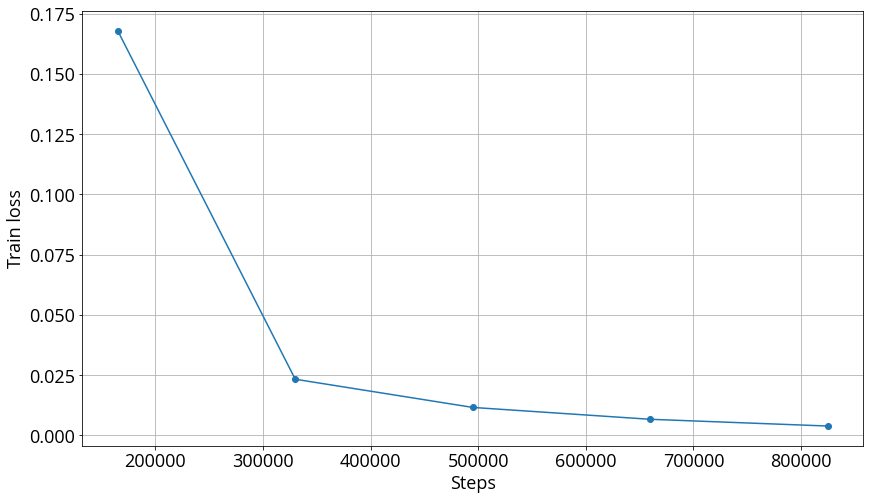

In [31]:
plt.plot(train_steps, train_loss, marker="o")
plt.xlabel("Steps")
plt.ylabel("Train loss")
plt.grid()
plt.show()

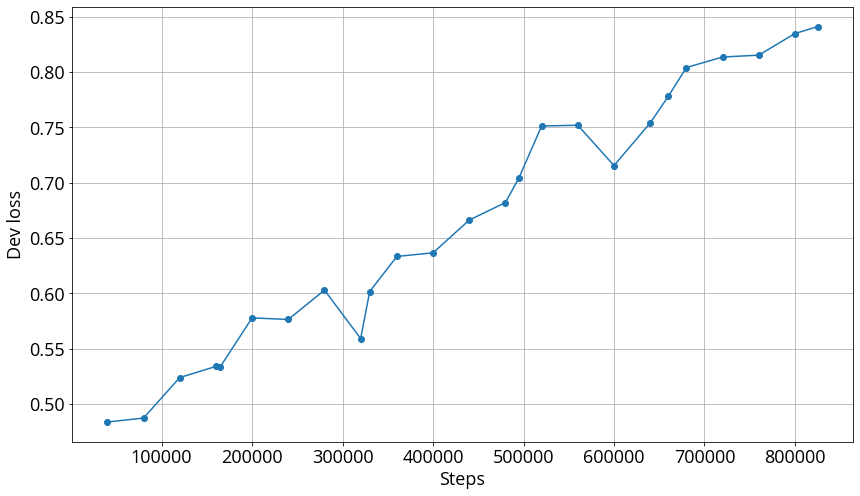

In [32]:
plt.plot(dev_steps, dev_loss, marker="o")
plt.xlabel("Steps")
plt.ylabel("Dev loss")
plt.grid()
plt.show()